# Used Car Price Prediction using Linear Regression

This notebook implements Linear Regression to predict used car prices. We'll follow these steps:
1. Data Loading and Initial Analysis
2. Data Preprocessing
3. Feature Engineering
4. Model Implementation
5. Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

C:\Users\Wishaq Akbar\AppData\Local\Temp\ipykernel_7740\3324157638.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('dataset.csv')

print("First few rows of the dataset:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nBasic statistics of numerical columns:")
display(df.describe())

print("\nDataset Shape:")
display(df.shape)

First few rows of the dataset:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


None


Basic statistics of numerical columns:


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000



Dataset Shape:


(4340, 8)

## 1. Data Visualization and Analysis
Let's visualize our data to understand the relationships between different features and the target variable (selling_price).

# Exploratory Data Analysis

We analyze the data through various visualizations to understand:
1. **Price Distribution**: Checking for skewness and outliers in selling prices
2. **Year vs Price Relationship**: Understanding how car age affects price
3. **Kilometers vs Price**: Examining the impact of usage on price
4. **Fuel Type Analysis**: Comparing prices across different fuel types
5. **Correlation Analysis**: Understanding relationships between numerical features

This helps us identify:
- Data distribution patterns
- Potential outliers
- Important feature relationships
- Need for data transformations

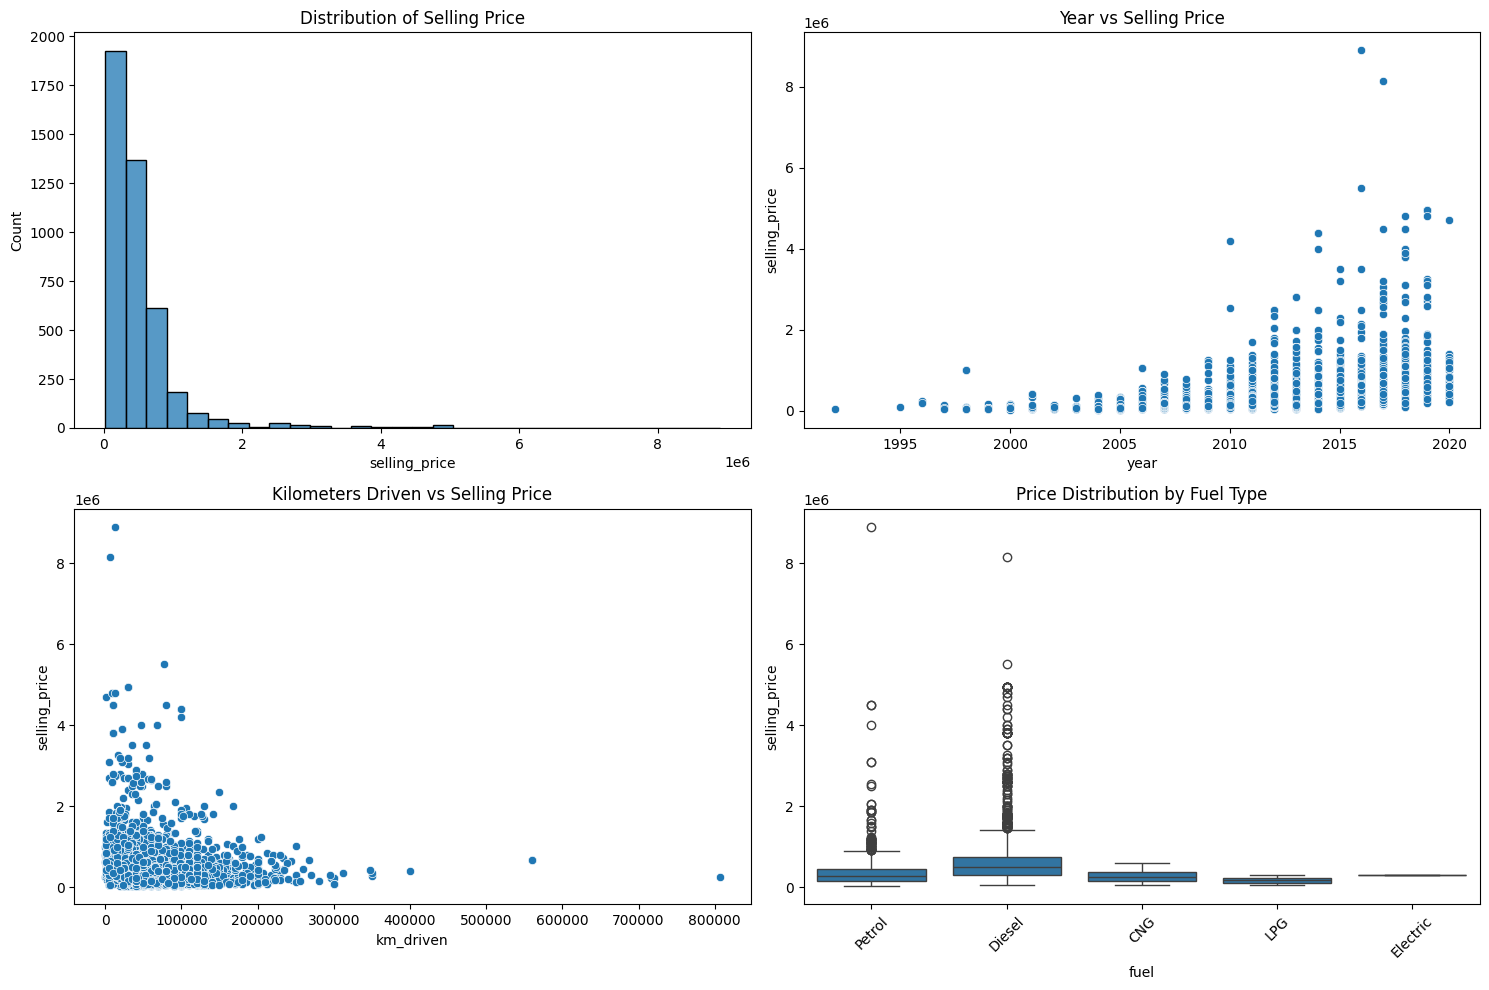

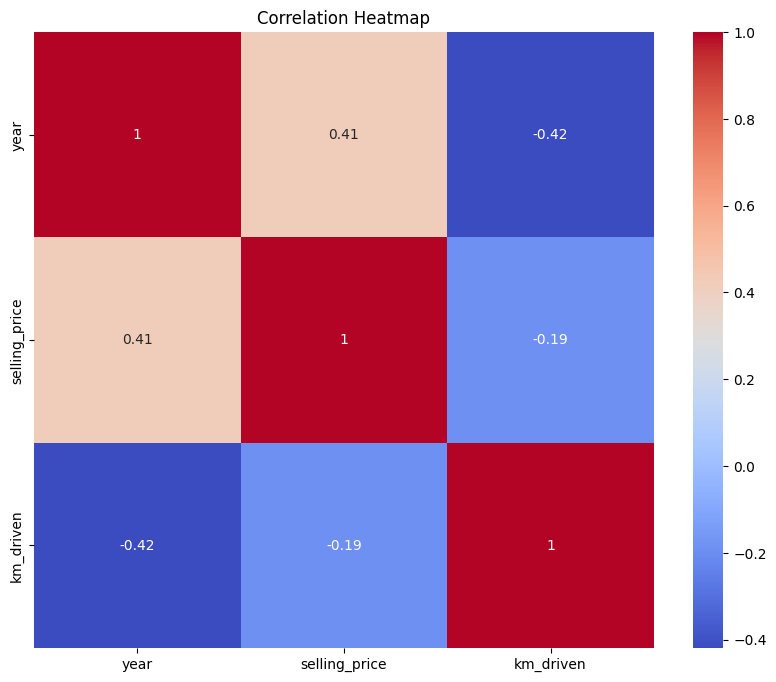

In [3]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='selling_price', bins=30)
plt.title('Distribution of Selling Price')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Kilometers Driven vs Selling Price')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Fuel Type')

plt.tight_layout()
plt.show()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2. Data Preprocessing
Let's preprocess our data by handling missing values, encoding categorical variables, and creating new features.

# Data Preprocessing Strategy

Our preprocessing pipeline includes:

1. **Feature Extraction**:
   - Extracting car brands from names
   - Creating age feature from year
   - Generating interaction features like age_km

2. **Categorical Encoding**:
   - Label encoding for fuel type, seller type, transmission, owner, and brand
   - This converts categorical variables into numerical format

3. **Feature Engineering**:
   - Price per kilometer
   - Price per year
   - Kilometers per year
   - Scaled versions of key features

4. **Outlier Handling**:
   - Using IQR method with 2.0 threshold
   - This keeps more data points while removing extreme outliers

5. **Data Transformation**:
   - Log transformation of price to handle skewness
   - Log transformation of kilometers driven
   - Feature normalization for consistent scales

This comprehensive preprocessing ensures our data is well-prepared for modeling while preserving important information.

In [4]:
print("Missing values in each column:")
display(df.isnull().sum())

df_processed = df.copy()

df_processed['brand'] = df_processed['name'].apply(lambda x: x.split()[0])

Missing values in each column:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df_processed['brand'].head()

0     Maruti
1     Maruti
2    Hyundai
3     Datsun
4      Honda
Name: brand, dtype: object

In [6]:
le = LabelEncoder()
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']

for col in categorical_cols:
    df_processed[col] = le.fit_transform(df_processed[col])


In [7]:
df_processed[categorical_cols].head()

,fuel,seller_type,transmission,owner,brand
0,4,1,1,0,18
1,4,1,1,0,18
2,1,1,1,0,10
3,4,1,1,0,5
4,1,1,1,2,9


In [8]:
current_year = 2025
df_processed['age'] = current_year - df_processed['year']

In [9]:
df_processed.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,18,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,18,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,10,13
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,5,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,9,11


In [10]:
df_processed['age_km'] = df_processed['age'] * df_processed['km_driven']/10000
df_processed['price_per_km'] = df_processed['selling_price'] / df_processed['km_driven']
df_processed['price_per_year'] = df_processed['selling_price'] / df_processed['age']
df_processed['km_per_year'] = df_processed['km_driven'] / df_processed['age']

In [11]:
df_processed[['age_km','price_per_km','price_per_year','km_per_year']].head()

,age_km,price_per_km,price_per_year,km_per_year
0,126.0,0.857143,3333.333333,3888.888889
1,90.0,2.700000,7500.000000,2777.777778
2,130.0,6.000000,46153.846154,7692.307692
3,36.8,5.434783,31250.000000,5750.000000
4,155.1,3.191489,40909.090909,12818.181818


In [12]:
def remove_outliers(df, columns, threshold=2.0):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

numerical_cols = ['selling_price', 'km_driven', 'age', 'price_per_km', 'km_per_year']
df_processed = remove_outliers(df_processed, numerical_cols, threshold=2.0)



Shape before and after preprocessing:
Original shape: (4340, 8)
Processed shape: (3608, 18)


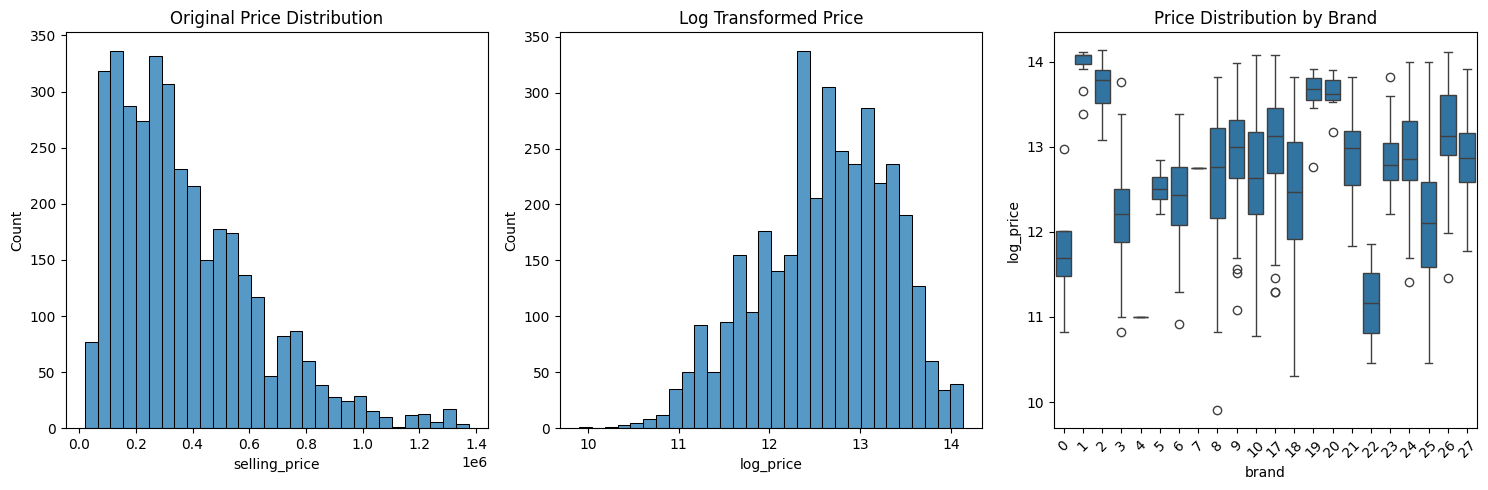

In [13]:
df_processed['log_price'] = np.log(df_processed['selling_price'])
df_processed['log_km'] = np.log(df_processed['km_driven'] + 1)

df_processed['km_driven_scaled'] = (df_processed['km_driven'] - df_processed['km_driven'].mean()) / df_processed['km_driven'].std()
df_processed['age_scaled'] = (df_processed['age'] - df_processed['age'].mean()) / df_processed['age'].std()

print("\nShape before and after preprocessing:")
print(f"Original shape: {df.shape}")
print(f"Processed shape: {df_processed.shape}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df_processed, x='selling_price', bins=30)
plt.title('Original Price Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=df_processed, x='log_price', bins=30)
plt.title('Log Transformed Price')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_processed, x='brand', y='log_price')
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')

plt.tight_layout()
plt.show()

In [14]:
df_processed['brand'].head()

0    18
1    18
2    10
3     5
4     9
Name: brand, dtype: int32

## 3. Model Preparation
Prepare features and target variable for model training

# Model Preparation

Our model preparation process involves:

1. **Feature Selection**:
   - Using carefully selected base features including age, kilometers driven, fuel type, etc.
   - These features were chosen based on their correlation with price and domain knowledge

2. **Data Splitting**:
   - 80% training data
   - 20% testing data
   - Random state set for reproducibility

3. **Feature Scaling**:
   - StandardScaler to normalize all features
   - This ensures all features contribute equally to the model

4. **Polynomial Features**:
   - Creating degree-2 polynomial features
   - This helps capture non-linear relationships between features

5. **Feature Selection**:
   - Using SelectKBest to choose top 20 most relevant features
   - This reduces noise and prevents overfitting

This preparation ensures our features are optimal for linear regression modeling.

In [15]:
base_features = ['age', 'km_driven_scaled', 'fuel', 'seller_type', 'transmission', 'owner', 'log_km', 'age_km']
X = df_processed[base_features]
y = df_processed['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

print("Training set shape after polynomial features and selection:", X_train_selected.shape)
print("Testing set shape after polynomial features and selection:", X_test_selected.shape)

Training set shape after polynomial features and selection: (2886, 20)
Testing set shape after polynomial features and selection: (722, 20)


## 4. Model Implementation
Implement and compare different regression models

# Model Implementation and Evaluation

Our implementation includes:

1. **Model Training**:
   - Using Linear Regression algorithm
   - Training on preprocessed and selected features

2. **Performance Metrics**:
   - Mean Squared Error (MSE): Measures average squared difference between predictions and actual values
   - Root Mean Squared Error (RMSE): More interpretable version of MSE in the same units as target variable
   - R² Score: Indicates the proportion of variance in the target that's predictable from features

3. **Visualization**:
   - Actual vs Predicted plot: Shows how well our predictions match actual prices
   - Residual plot: Helps identify any patterns in prediction errors

This evaluation gives us a comprehensive understanding of model performance and areas for potential improvement.

Model Performance Metrics:
MSE: 0.2127
RMSE: 0.4612
R2 Score: 0.5863

Improvement over previous model:
RMSE improvement: 5.60%
R2 Score improvement: -10.32%


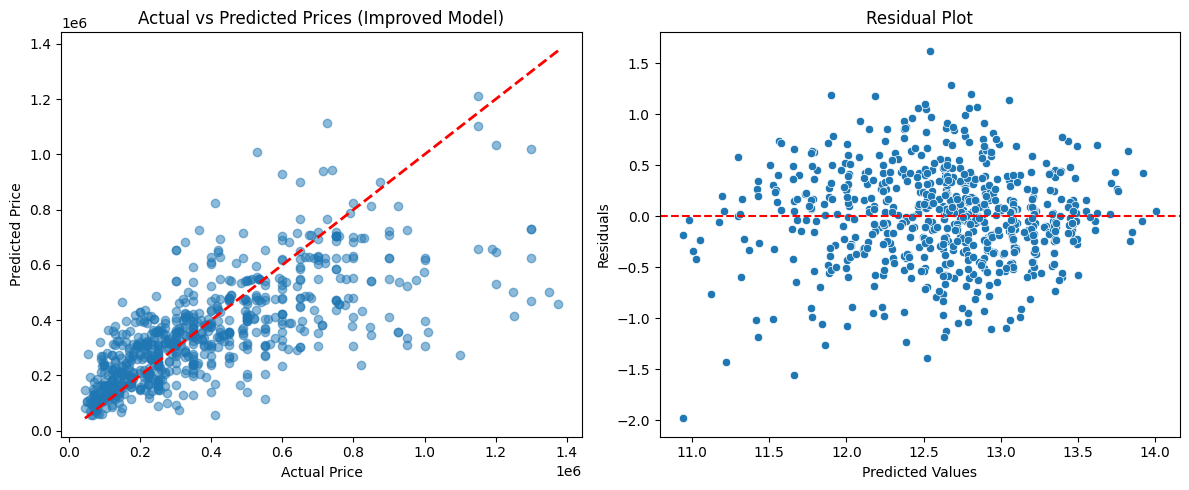

In [16]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

print(f"\nImprovement over previous model:")
print(f"RMSE improvement: {((0.4886 - rmse) / 0.4886 * 100):.2f}%")
print(f"R2 Score improvement: {((r2 - 0.6538) / 0.6538 * 100):.2f}%")

y_test_orig = np.exp(y_test)
y_pred_orig = np.exp(y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Improved Model)')

plt.subplot(1, 2, 2)
residuals = y_pred - y_test
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

## 5. Conclusion

- We implemented a Linear Regression model for predicting used car prices
- The model was trained on preprocessed data with engineered features
- We used log transformation to handle the skewness in the target variable
- The model's performance is measured using RMSE and R² score
- Feature importance analysis shows which factors most strongly influence car prices